# <span style="color:yellow">ΚΑΘΟΡΙΣΜΟΣ ΤΟΥ DIRECTORY ΟΠΟΥ ΒΡΙΣΚΕΤΑΙ ΤΟ ΑΡΧΕΙΟ

In [1]:
pwd #Καθορίζει το path file του αρχείου που εκτελείται

'C:\\Users\\Kosta\\Python_Projects\\JupyterProject\\SVR_lags_Model_1'

# <span style="color:yellow">ΕΙΣΑΓΩΓΗ ΤΩΝ ΑΠΑΡΑΙΤΡΗΤΩΝ ΒΙΒΛΙΟΘΗΚΩΝ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΚΩΔΙΚΑ


In [2]:
#Βιβλιοθήκες για την εισαγωγή και επεξεργασία των δεδομένων
import warnings
import numpy as np
import pandas as pd

#Βιβλιοθήκες για την εκτύπωση των διαγραμμάτων
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Βιβλιοθήκες για εκπαίδευση μοντέλων μηχανικής μάθησης
from sklearn.svm import SVR
from arch import arch_model
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# <span style="color:yellow">ΚΑΘΟΡΙΣΜΟΣ ΑΚΡΙΒΕΙΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ

In [3]:
#Καθορισμός ακριβείας του μοντέλου
pd.set_option("display.precision", 2)

# <span style="color:yellow">ΕΙΣΑΓΩΓΗ ΚΑΙ ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ ΑΡΧΕΙΟΥ ΠΟΥ ΕΙΝΑΙ ΑΠΑΡΑΙΤΗΤΟ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΑΛΓΟΡΙΘΜΟΥ

In [4]:
#Αναγνώριση του αρχείου και εισαγωγή του στο πρόγραμμα
df = pd.read_excel('../FINAL_DATA/Greece_Values.xlsx')

#Δημιουργία DataFrame
df.head()

#Δίνει την εκτύπωση των πέντε πρώτων στηλών των δεδομένων
print(df.head())

        Date  Daily Volume of Transactions  Daily Closing Prices  \
0 2023-12-29                      14325455               1293.14   
1 2023-12-28                       9359690               1285.65   
2 2023-12-27                      11932640               1293.19   
3 2023-12-22                      17777385               1290.89   
4 2023-12-21                      12093042               1298.56   

   20-Day Moving Average  Daily Position with Bollinger Bands  \
0                1284.35                                 0.70   
1                1283.30                                 0.53   
2                1281.91                                 0.73   
3                1280.30                                 0.70   
4                1278.40                                 0.87   

   Historical Volatility    RSI  GDP Growth  Daily Returns  \
0                   6.81  61.55        2.01           0.58   
1                   6.75  61.15        2.01          -0.58   
2             

# <span style="color:yellow">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

In [5]:
#Επιστρέφει το σύνολο των γραμμών του αρχείου στο οποίο βρίσκονται τα δεδομένα
len(df)

2626

In [6]:
#Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
df.columns

Index(['Date', 'Daily Volume of Transactions', 'Daily Closing Prices',
       '20-Day Moving Average', 'Daily Position with Bollinger Bands',
       'Historical Volatility', 'RSI', 'GDP Growth', 'Daily Returns',
       'Exponential Moving Average (EMA)',
       '7- Day Standard Deviation of Daily Returns'],
      dtype='object')

In [7]:
# Επιστρέφει το σύνολο όλων των τιμών στο DataFrame
total_values = df.size

#Aυτή η γραμμή κώδικα εκτυπώνει το συνολικό πλήθος των δεδομένων που περιέχονται στο `DataFrame`
print(f"Σύνολο δεδομένων στο DataFrame: {total_values}")

Σύνολο δεδομένων στο DataFrame: 28886


In [8]:
#Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου. To dataset αποτελείται από 11 στήλες από τις οποίες οι δέκα περιέχουν αριθμητικά δεδομένα και η μια ημερομηνία
df.dtypes

Date                                          datetime64[ns]
Daily Volume of Transactions                           int64
Daily Closing Prices                                 float64
20-Day Moving Average                                float64
Daily Position with Bollinger Bands                  float64
Historical Volatility                                float64
RSI                                                  float64
GDP Growth                                           float64
Daily Returns                                        float64
Exponential Moving Average (EMA)                     float64
7- Day Standard Deviation of Daily Returns           float64
dtype: object

In [9]:
# Εκτυπώνει το όνομα των στηλών και τον τύπο των δεδομένων που περιέχουν
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        2626 non-null   datetime64[ns]
 1   Daily Volume of Transactions                2626 non-null   int64         
 2   Daily Closing Prices                        2626 non-null   float64       
 3   20-Day Moving Average                       2626 non-null   float64       
 4   Daily Position with Bollinger Bands         2626 non-null   float64       
 5   Historical Volatility                       2626 non-null   float64       
 6   RSI                                         2626 non-null   float64       
 7   GDP Growth                                  2626 non-null   float64       
 8   Daily Returns                               2626 non-null   float64       
 9   Exponent

In [10]:
#Εκτυπώνει το είδος της κάθε μεταβλητής του dataset
print(df.dtypes)

Date                                          datetime64[ns]
Daily Volume of Transactions                           int64
Daily Closing Prices                                 float64
20-Day Moving Average                                float64
Daily Position with Bollinger Bands                  float64
Historical Volatility                                float64
RSI                                                  float64
GDP Growth                                           float64
Daily Returns                                        float64
Exponential Moving Average (EMA)                     float64
7- Day Standard Deviation of Daily Returns           float64
dtype: object


In [11]:
#Δίνει τον πίνακα συσχέτισης των μεταβλητών του dataset
df.corr()

,Date,Daily Volume of Transactions,Daily Closing Prices,20-Day Moving Average,Daily Position with Bollinger Bands,Historical Volatility,RSI,GDP Growth,Daily Returns,Exponential Moving Average (EMA),7- Day Standard Deviation of Daily Returns
Date,1.00,-0.40,0.10,0.09,0.11,-0.37,0.13,3.24e-01,1.88e-02,0.10,-0.32
Daily Volume of Transactions,-0.40,1.00,-0.18,-0.17,-0.06,0.38,-0.07,-1.24e-01,2.16e-02,-0.17,0.39
Daily Closing Prices,0.10,-0.18,1.00,0.98,0.14,-0.19,0.18,2.29e-01,4.05e-02,0.99,-0.16
20-Day Moving Average,0.09,-0.17,0.98,1.00,-0.04,-0.14,0.02,2.24e-01,-3.39e-02,1.00,-0.08
Daily Position with Bollinger Bands,0.11,-0.06,0.14,-0.04,1.00,-0.16,0.78,4.75e-02,3.84e-01,0.02,-0.25
Historical Volatility,-0.37,0.38,-0.19,-0.14,-0.16,1.00,-0.28,-3.53e-01,-1.41e-02,-0.17,0.82
RSI,0.13,-0.07,0.18,0.02,0.78,-0.28,1.00,3.22e-02,1.96e-01,0.08,-0.32
GDP Growth,0.32,-0.12,0.23,0.22,0.05,-0.35,0.03,1.00e+00,8.21e-03,0.23,-0.30
Daily Returns,0.02,0.02,0.04,-0.03,0.38,-0.01,0.20,8.21e-03,1.00e+00,-0.03,-0.03
Exponential Moving Average (EMA),0.10,-0.17,0.99,1.00,0.02,-0.17,0.08,2.26e-01,-2.55e-02,1.00,-0.11


# <span style="color:yellow">ΠΡΟΕΤΟΙΜΑΣΙΑ ΤΩΝ ΔΕΟΔΜΕΝΩΝ

In [12]:
# Έλεγχος για ελλείπουσες τιμές (NaN)
missing_values = df.isnull().sum()

# Εμφάνιση των αποτελεσμάτων
print("Ελλείπουσες τιμές ανά στήλη:")
print(missing_values)

Ελλείπουσες τιμές ανά στήλη:
Date                                          0
Daily Volume of Transactions                  0
Daily Closing Prices                          0
20-Day Moving Average                         0
Daily Position with Bollinger Bands           0
Historical Volatility                         0
RSI                                           0
GDP Growth                                    0
Daily Returns                                 0
Exponential Moving Average (EMA)              0
7- Day Standard Deviation of Daily Returns    0
dtype: int64


In [13]:
# Υπολογισμός Z-Scores για αριθμητικές στήλες
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)

# Καθορισμός ακραιών τιμών (π.χ., όριο Z-Score > |3|)
threshold = 3
outliers = (z_scores.abs() > threshold)

# Εμφάνιση ακραίων τιμών
print("Ακραιες τιμές ανά στήλη:")
for column in outliers.columns:
    print(f"\nΣτήλη: {column}")
    print(df.loc[outliers[column], column])

Ακραιες τιμές ανά στήλη:

Στήλη: Daily Volume of Transactions
650     263321063
896     461522585
1259    260964872
1555    259389020
1872    280884463
1894    269082795
1895    294113209
1904    283025983
1936    390550668
1961    268604777
1963    260828009
1977    335465540
1990    435327799
1994    342259737
1995    722510394
1996    437506197
1997    404001339
1998    553687559
1999    682670858
2000    313871713
2001    313640591
2008    411406657
2014    362831335
2017    326384051
2018    261177559
2019    350177257
2020    320448564
2021    366229387
2023    289886146
2024    423909229
2026    263904362
2028    272924297
2029    412272184
2030    348071245
2068    282835927
2091    405145809
2092    288759380
2114    294712250
2138    277915252
2152    449082639
2154    283282746
2157    379896328
2158    657688457
2176    333840070
2177    371599678
2178    360228583
2182    325299422
2189    375926053
2190    394768518
2192    256869341
2193    305183821
2194    317539967
21

In [14]:
# Φιλτράρισμα δεδομένων για απομάκρυνση γραμμών με ακραίες τιμές
df_without_outliers = df[~(z_scores.abs() > threshold).any(axis=1)]

# Εμφάνιση του περιεχομένου του DataFrame μετά την αφαίρεση των ακραίων τιμών
print("\nDataFrame μετά την αφαίρεση ακραίων τιμών:")
print(df_without_outliers)


DataFrame μετά την αφαίρεση ακραίων τιμών:
           Date  Daily Volume of Transactions  Daily Closing Prices  \
0    2023-12-29                      14325455               1293.14   
1    2023-12-28                       9359690               1285.65   
2    2023-12-27                      11932640               1293.19   
3    2023-12-22                      17777385               1290.89   
4    2023-12-21                      12093042               1298.56   
...         ...                           ...                   ...   
2620 2013-05-13                     113156012               1065.22   
2621 2013-05-10                      96144894               1034.39   
2622 2013-05-09                      94136464               1066.29   
2624 2013-05-02                      46208066                983.64   
2625 2013-04-30                      65289426                974.09   

      20-Day Moving Average  Daily Position with Bollinger Bands  \
0                   1284.35        

In [15]:
# Μετατροπή της στήλης 'Date' σε datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d',
                            errors='coerce')  # Προσαρμόστε το format ανάλογα με τη μορφή της ημερομηνίας σας

# Έλεγχος αν η μετατροπή ήταν επιτυχής
print(df['Date'].head())

# Προαιρετικά: Ρύθμιση της στήλης 'Date' ως index
df.set_index('Date', inplace=True)

# Έλεγχος του DataFrame
print(df.head())

0   2023-12-29
1   2023-12-28
2   2023-12-27
3   2023-12-22
4   2023-12-21
Name: Date, dtype: datetime64[ns]
            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2023-12-29                      14325455               1293.14   
2023-12-28                       9359690               1285.65   
2023-12-27                      11932640               1293.19   
2023-12-22                      17777385               1290.89   
2023-12-21                      12093042               1298.56   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2023-12-29                1284.35                                 0.70   
2023-12-28                1283.30                                 0.53   
2023-12-27                1281.91                                 0.73   
2023-12-22                1280.30                         

In [16]:
# Χρησιμοποιείται το index του DataFrame, το οποίο είναι τύπου DatetimeIndex.
df.index

# Το DataFrame ταξινομείται με βάση το index του σε αύξουσα σειρά.
df = df.sort_index()

# Εκτυπώνονται οι πρώτες γραμμές του ταξινομημένου DataFrame για επισκόπηση.
print(df.head())

            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2013-04-30                      65289426                974.09   
2013-05-02                      46208066                983.64   
2013-05-08                      93343468               1043.28   
2013-05-09                      94136464               1066.29   
2013-05-10                      96144894               1034.39   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2013-04-30                 909.08                                 0.81   
2013-05-02                 914.97                                 0.83   
2013-05-08                 922.26                                 1.06   
2013-05-09                 932.29                                 1.09   
2013-05-10                 944.46                                 0.92   

            Histor

# <span style="color:yellow">Δημιουργία Χρονικών Υστερήσεων (Lagged Variables)

In [17]:
# Ορισμός των χρονικών υστερήσεων (lags) που θέλουμε
lags = [7, 14, 21]  #

# Επιλογή των αριθμητικών στηλών στο DataFrame
columns_to_lag = df.select_dtypes(include=[np.number]).columns

# Δημιουργία νέου DataFrame για τις lagged μεταβλητές
lagged_data = pd.DataFrame(index=df.index)

# Δημιουργία lagged μεταβλητών για κάθε επιλεγμένη στήλη
for col in columns_to_lag:
    for lag in lags:
        lagged_data[f"{col}_lag_{lag}"] = df[col].shift(lag)

# Ενοποίηση του αρχικού DataFrame με τις lagged μεταβλητές
df = pd.concat([df, lagged_data], axis=1)

# Αφαίρεση των γραμμών που περιέχουν NaN λόγω των χρονικών υστερήσεων
df.dropna(inplace=True)

# Επισκόπηση του τελικού DataFrame
print("\nDataFrame με υστερήσεις 7, 14, 21 ημερών:")
print(df.head())


DataFrame με υστερήσεις 7, 14, 21 ημερών:
            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2013-06-04                      90444882                981.50   
2013-06-05                      17629288                985.36   
2013-06-06                      15777081                976.95   
2013-06-07                      16743539                986.05   
2013-06-10                      25106225                939.78   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2013-06-04                1057.61                                 0.10   
2013-06-05                1057.50                                 0.15   
2013-06-06                1054.60                                 0.15   
2013-06-07                1050.14                                 0.22   
2013-06-10                1047.72                 

# <span style="color:yellow">Καθορισμός Μεταβλητών Μοντέλου SVR

In [18]:
# Καθορισμός της εξαρτημένης μεταβλητής (μεταβλητότητα)
dependent_var = "7- Day Standard Deviation of Daily Returns"

In [19]:
# Δημιουργία του X (independent) και y (dependent)
X = df.drop(columns=[dependent_var])
y = df[dependent_var]

# <span style="color:yellow">Διαχωρισμός σε train (80%) - test (20%) split

In [20]:
# Το 80% των δεδομένων χρησιμοποιείται για εκπαίδευση
train_size = int(len(df) * 0.8)

# Διαχωρισμός χαρακτηριστικών σε train και test set
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]

# Διαχωρισμός target μεταβλητής σε train και test set
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


# Επισκόπηση μεγεθών των training και test set.
print(f"Μέγεθος X_train: {X_train.shape}")
print(f"Μέγεθος X_test: {X_test.shape}")
print(f"Μέγεθος y_train: {y_train.shape}")
print(f"Μέγεθος y_test: {y_test.shape}")


# Εκτύπωση τιμών στο Training και Test Set
print("\nΠρώτες γραμμές του X_train:")
print(X_train.head())

print("\nΠρώτες γραμμές του X_test:")
print(X_test.head())

Μέγεθος X_train: (2084, 39)
Μέγεθος X_test: (521, 39)
Μέγεθος y_train: (2084,)
Μέγεθος y_test: (521,)

Πρώτες γραμμές του X_train:
            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2013-06-04                      90444882                981.50   
2013-06-05                      17629288                985.36   
2013-06-06                      15777081                976.95   
2013-06-07                      16743539                986.05   
2013-06-10                      25106225                939.78   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2013-06-04                1057.61                                 0.10   
2013-06-05                1057.50                                 0.15   
2013-06-06                1054.60                                 0.15   
2013-06-07                1050.14   

# <span style="color:yellow">Κανονικοποίηση Δεδομένων

In [21]:
# Υπολογισμός μέσου όρου και τυπικής απόκλισης
X_train_mean = X_train.mean()
X_train_std = X_train.std()

# Κανονικοποίηση δεδομένων
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Εκτύπωση αποτελεσμάτων
print("Μέσος όρος των χαρακτηριστικών του X_train:")
print(X_train_mean)

print("\nΤυπική απόκλιση των χαρακτηριστικών του X_train:")
print(X_train_std)

print("\nΠρώτες 5 γραμμές του κανονικοποιημένου X_train:")
print(X_train.head())

print("\nΠρώτες 5 γραμμές του κανονικοποιημένου X_test:")
print(X_test.head())

Μέσος όρος των χαρακτηριστικών του X_train:
Daily Volume of Transactions                         6.59e+07
Daily Closing Prices                                 8.03e+02
20-Day Moving Average                                8.03e+02
Daily Position with Bollinger Bands                  5.19e-01
Historical Volatility                                2.62e+01
RSI                                                  5.20e+01
GDP Growth                                           1.46e-01
Daily Returns                                        1.12e-02
Exponential Moving Average (EMA)                     6.95e+02
Daily Volume of Transactions_lag_7                   6.61e+07
Daily Volume of Transactions_lag_14                  6.65e+07
Daily Volume of Transactions_lag_21                  6.67e+07
Daily Closing Prices_lag_7                           8.03e+02
Daily Closing Prices_lag_14                          8.04e+02
Daily Closing Prices_lag_21                          8.04e+02
20-Day Moving Average_lag_

# <span style="color:yellow">Support Vector Regression Model (SVR)

In [22]:
# Δημιουργία του μοντέλου SVR
model= svr = SVR(kernel="linear", C=1.0)  # Χρησιμοποιείται γραμμικός πυρήνας

In [23]:
# Εκπαίδευση του μοντέλου SVR
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [24]:
# Πρόβλεψη στο Training Set
y_train_pred = svr.predict(X_train)

# Εκτύπωση των πρώτων 10 αποτελεσμάτων της πρόβλεψης
print("Προβλέψεις για το X_train:")
print(y_train_pred[:10])

Προβλέψεις για το X_train:
[2.53941838 1.71544336 2.17141662 1.78806343 2.05330642 2.30863547
 1.85659547 2.21663619 2.72385902 2.80659055]


In [25]:
# Πρόβλεψη αποτελεσμάτων για το X_test
y_pred = svr.predict(X_test)

# Εκτύπωση των πρώτων 10 αποτελεσμάτων της πρόβλεψης
print("Προβλέψεις για το X_test:")
print(y_pred[:10])

Προβλέψεις για το X_test:
[2.15131816 2.0903452  2.14087246 1.90589704 1.88873615 1.64363731
 1.20250758 1.03488293 1.00240789 0.93456443]


# <span style="color:yellow">Support Vector Regression Model (y_train)

In [26]:
# Υπολογισμός μετρικών αξιολόγησης
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Εκτύπωση αποτελεσμάτων αξιολόγησης
print("Αξιολόγηση στο Training Set:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R^2 Score: {r2_train:.4f}")

# Δημιουργία DataFrame για τις μετρικές
metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R² Score"],
    "Value": [mse_train, rmse_train, r2_train]
})

# Αποθήκευση των μετρικών σε αρχείο Excel
metrics_df.to_excel("training_metrics-train.xlsx", index=False)

Αξιολόγηση στο Training Set:
Mean Squared Error (MSE): 0.1458
Root Mean Squared Error (RMSE): 0.3819
R^2 Score: 0.8839


# <span style="color:yellow">Support Vector Regression Model (y_test)

In [27]:
# Υπολογισμός των μετρικών αξιολόγησης του μοντέλου SVR
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Εκτύπωση των αποτελεσμάτων
print("Αξιολόγηση στο Test Set:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Δημιουργία DataFrame για τις μετρικές
metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R² Score"],
    "Value": [mse, rmse, r2]
})

# Αποθήκευση των μετρικών σε αρχείο Excel
metrics_df.to_excel("training_metrics-test.xlsx", index=False)

Αξιολόγηση στο Test Set:
Mean Squared Error (MSE): 0.040
Root Mean Squared Error (RMSE): 0.201
R² Score: 0.887


# <span style="color:yellow">Πρόβλεψη για τις επόμενες 7 ημέρες

In [28]:
# Εισαγωγή της τελευταίας γραμμής από το dataset
latest_features = X_test.iloc[-1].copy()

# Καθαρισμός της γραμμής από NaN τιμές (αντικατάσταση με 0)
latest_features.fillna(0, inplace=True)

print("Καθαρισμένη Τελευταία Γραμμή από το X_test (latest_features):")
print(latest_features)

Καθαρισμένη Τελευταία Γραμμή από το X_test (latest_features):
Daily Volume of Transactions                        -0.75
Daily Closing Prices                                 2.60
20-Day Moving Average                                2.57
Daily Position with Bollinger Bands                  0.53
Historical Volatility                               -1.24
RSI                                                  0.63
GDP Growth                                           0.42
Daily Returns                                        0.30
Exponential Moving Average (EMA)                     2.60
Daily Volume of Transactions_lag_7                  -0.70
Daily Volume of Transactions_lag_14                 -0.65
Daily Volume of Transactions_lag_21                 -0.66
Daily Closing Prices_lag_7                           2.56
Daily Closing Prices_lag_14                          2.48
Daily Closing Prices_lag_21                          2.42
20-Day Moving Average_lag_7                          2.50
20-Day Mov

In [29]:
# Πίνακας για νέα δεδομένα, δημιουργούνται 7 ημερομηνίες
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=7, freq="D")

# Εκτύπωση για τον έλεγχο των μελλοντικών ημερομηνιών
print("Νέες ημερομηνίες για τις προβλέψεις:")
print(future_dates)

# Αποθήκευση προβλέψεων
future_predictions = []

# Έλεγχος NaN τιμών και αντικατάστασή τους αν χρειάζεται
if latest_features.isnull().any():
    print("\nΕντοπίστηκαν NaN τιμές στην τελευταία γραμμή! Αντικαθίστανται με τον μέσο όρο των χαρακτηριστικών.")
    latest_features = latest_features.fillna(X_train.mean())

Νέες ημερομηνίες για τις προβλέψεις:
DatetimeIndex(['2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02',
               '2024-01-03', '2024-01-04', '2024-01-05'],
              dtype='datetime64[ns]', freq='D')


In [30]:
# Απενεργοποιεί όλα τα warnings
warnings.filterwarnings("ignore")

# Ενσωμάτωση μοντέλου SVR (από πριν εκπαιδευμένο)
print("\nΈναρξη Δημιουργίας Προβλέψεων:")
for i, date in enumerate(future_dates):
    # Κανονικοποιούμε την τελευταία γραμμή με βάση τα mean και std των δεδομένων εκπαίδευσης
    latest_features_scaled = (latest_features - X_train.mean()) / X_train.std()

    # Αν υπάρχουν NaN μετά την κανονικοποίηση, τα αντικαθιστούμε με 0
    if np.any(np.isnan(latest_features_scaled)):
        print(f"Εντοπίστηκε NaN κατά την κανονικοποίηση των δεδομένων για την πρόβλεψη {i + 1}. Αντικαθίστανται με 0.")
        latest_features_scaled = np.nan_to_num(latest_features_scaled)

    # Πρόβλεψη για μία ημέρα
    prediction = svr.predict([latest_features_scaled])[0]  # Εκτέλεση πρόβλεψης με το μοντέλο
    future_predictions.append(prediction)
    print(f"Πρόβλεψη για {date.date()}: {prediction}")

    # Ενημερώνουμε το τελευταίο feature με την πρόβλεψη για τη νέα τιμή
    latest_features["7- Day Standard Deviation of Daily Returns_lag_7"] = prediction


Έναρξη Δημιουργίας Προβλέψεων:
Πρόβλεψη για 2023-12-30: 0.5174674825449748
Πρόβλεψη για 2023-12-31: -0.33420565265951807
Πρόβλεψη για 2024-01-01: 0.12969953003455204
Πρόβλεψη για 2024-01-02: -0.12298898347521159
Πρόβλεψη για 2024-01-03: 0.014650101497652779
Πρόβλεψη για 2024-01-04: -0.06032171834796585
Πρόβλεψη για 2024-01-05: -0.019484671430147094


In [31]:
# Δημιουργία DataFrame για μελλοντικές προβλέψεις
future_df = pd.DataFrame({
    "Date": future_dates,
    "Prediction": future_predictions
})

# Εκτύπωση DataFrame
print("\nΠροβλέψεις για τις Επόμενες 7 Ημέρες:")
print(future_df)


Προβλέψεις για τις Επόμενες 7 Ημέρες:
        Date  Prediction
0 2023-12-30        0.52
1 2023-12-31       -0.33
2 2024-01-01        0.13
3 2024-01-02       -0.12
4 2024-01-03        0.01
5 2024-01-04       -0.06
6 2024-01-05       -0.02


# <span style="color:yellow">Οπτικοποίηση Αποτελεσμάτων

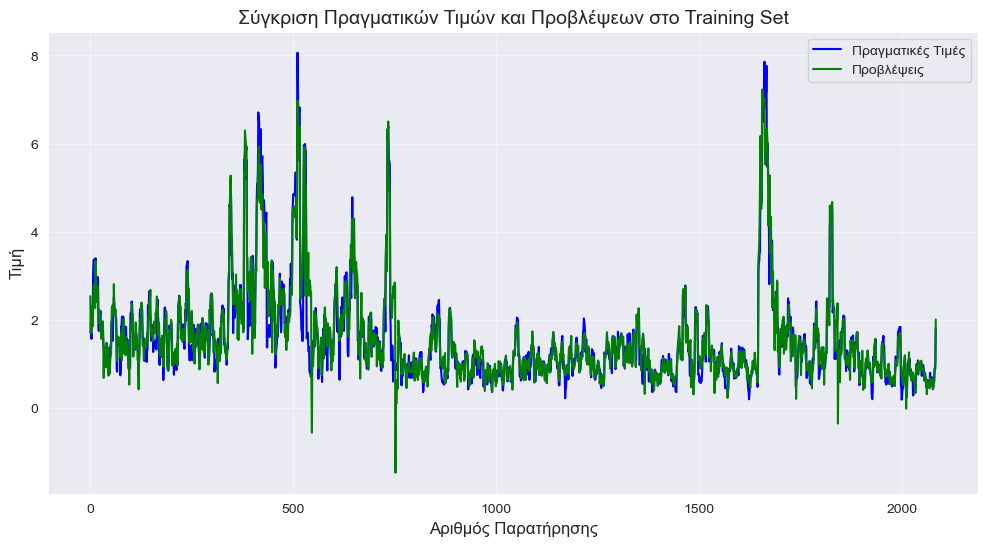

In [32]:
# Δημιουργία του διαγράμματος για το Training Set
plt.figure(figsize=(12, 6))

# Προβολή των πραγματικών τιμών (y_train) στο διάγραμμα
plt.plot(y_train.values, label="Πραγματικές Τιμές", color="blue", linestyle="-")

# Προβολή των προβλέψεων του μοντέλου (y_train_pred) στο διάγραμμα
plt.plot(y_train_pred, label="Προβλέψεις", color="green", linestyle="-")

# Προσθήκη τίτλου και ετικετών
plt.title("Σύγκριση Πραγματικών Τιμών και Προβλέψεων στο Training Set", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Τιμή", fontsize=12)

# Προσθήκη υπομνήματος
plt.legend()

# Εμφάνιση πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του διαγράμματος
plt.show()

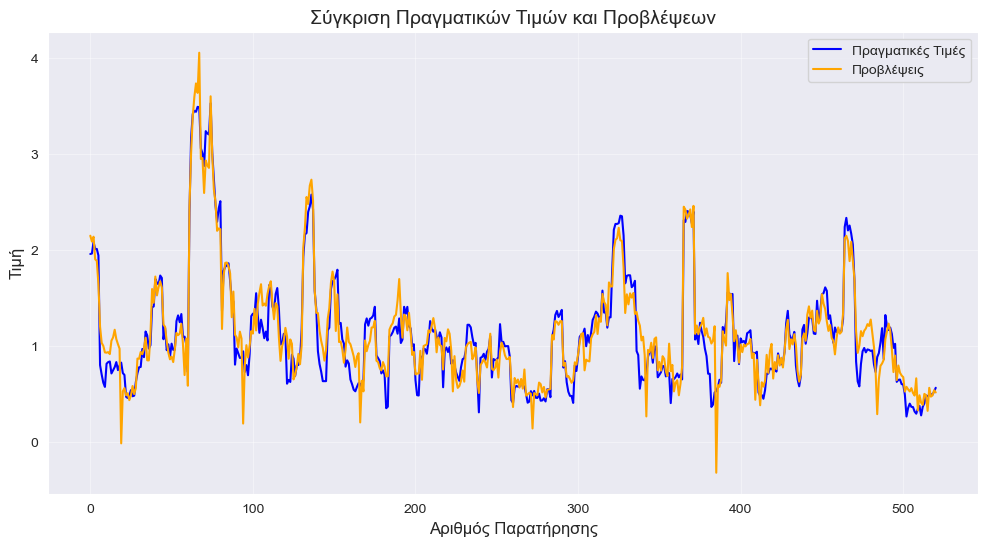

In [33]:
# Δημιουργία του διαγράμματος
plt.figure(figsize=(12, 6))

# Προβολή των πραγματικών τιμών (y_test) στο διάγραμμα
plt.plot(y_test.values, label="Πραγματικές Τιμές", color="blue", linestyle="-")

# Προβολή των προβλέψεων του μοντέλου (y_pred) στο διάγραμμα
plt.plot(y_pred, label="Προβλέψεις", color="orange", linestyle="-")

# Προσθήκη τίτλου και ετικετών
plt.title("Σύγκριση Πραγματικών Τιμών και Προβλέψεων", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Τιμή", fontsize=12)

# Προσθήκη υπομνήματος
plt.legend()

# Εμφάνιση πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του διαγράμματος
plt.show()

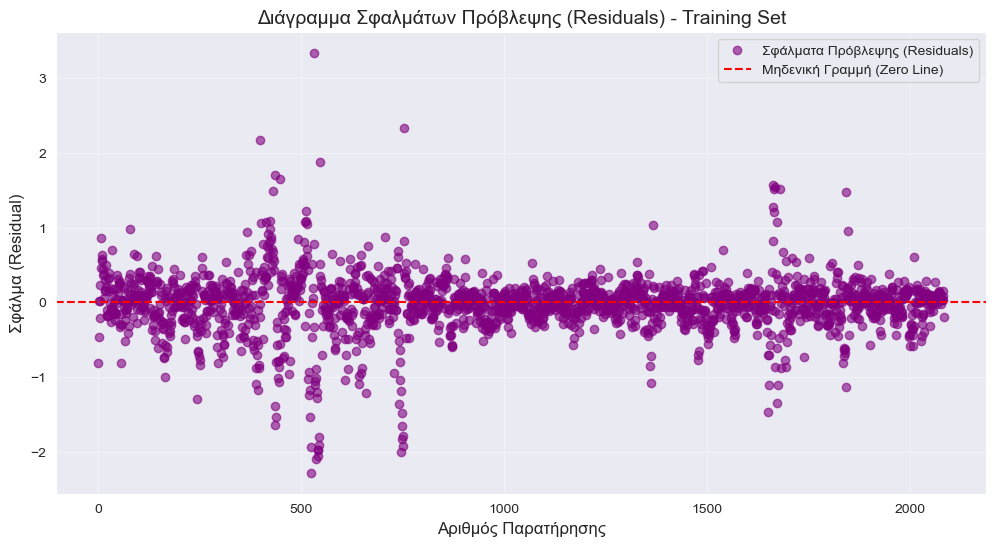

In [34]:
# Υπολογισμός των σφαλμάτων πρόβλεψης (Residuals) για το Training Set
residuals_train = y_train.values - y_train_pred

# Διάγραμμα Διασποράς για τα Σφάλματα Πρόβλεψης στο Training Set
plt.figure(figsize=(12, 6))

# Scatter Plot των Σφαλμάτων
plt.scatter(range(len(residuals_train)), residuals_train, color="purple", alpha=0.6,
            label="Σφάλματα Πρόβλεψης (Residuals)")

# Χωριστή γραμμή για το μηδέν (Zero Line)
plt.axhline(y=0, color="red", linestyle="--", label="Μηδενική Γραμμή (Zero Line)")

# Προσθήκη τίτλου και ετικετών
plt.title("Διάγραμμα Σφαλμάτων Πρόβλεψης (Residuals) - Training Set", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Σφάλμα (Residual)", fontsize=12)

# Προσθήκη Υπομνήματος
plt.legend()

# Εμφάνιση πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του Διαγράμματος
plt.show()

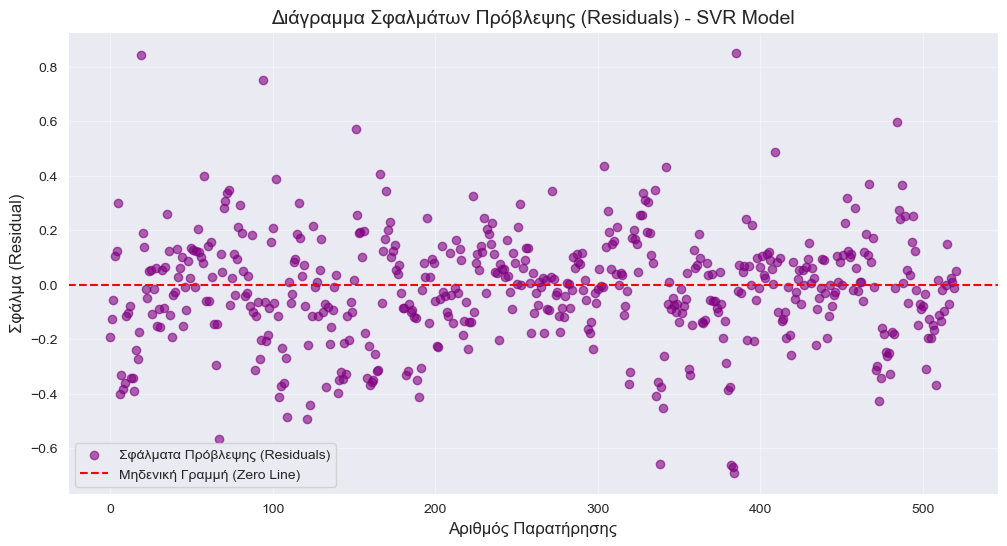

In [35]:
# Υπολογισμός των σφαλμάτων πρόβλεψης (Residuals)
residuals = y_test.values - y_pred

# Διάγραμμα Διασποράς για τα Σφάλματα Πρόβλεψης
plt.figure(figsize=(12, 6))

# Scatter Plot των Σφάλμάτων
plt.scatter(range(len(residuals)), residuals, color="purple", alpha=0.6, label="Σφάλματα Πρόβλεψης (Residuals)")

# Χωριστή γραμμή για το μηδέν (Zero Line)
plt.axhline(y=0, color="red", linestyle="--", label="Μηδενική Γραμμή (Zero Line)")

# Προσθήκη τίτλου και ετικετών
plt.title("Διάγραμμα Σφαλμάτων Πρόβλεψης (Residuals) - SVR Model", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Σφάλμα (Residual)", fontsize=12)

# Προσθήκη Υπομνήματος
plt.legend()

# Εμφάνιση πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του Διαγράμματος
plt.show()

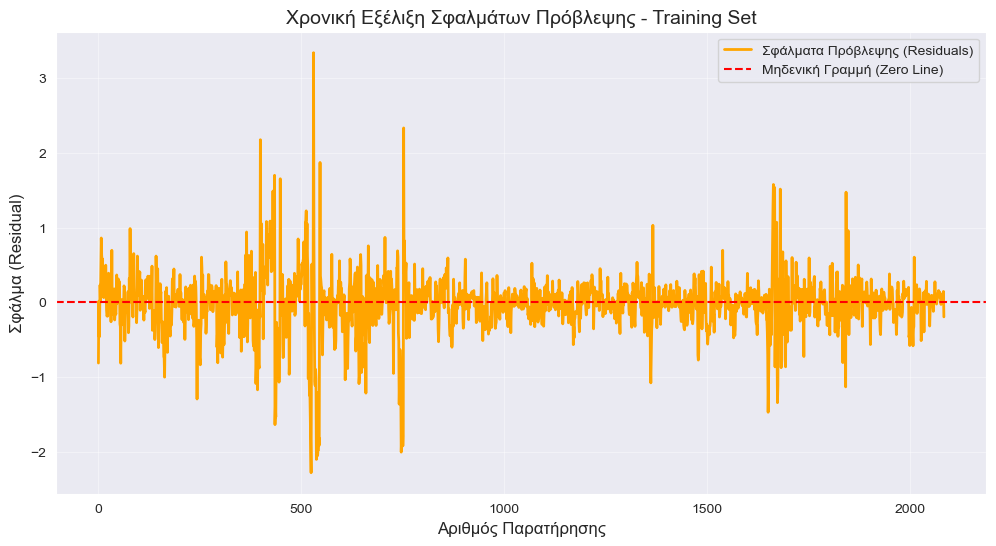

In [36]:
# Διάγραμμα Γραμμής για την Εξέλιξη των Σφαλμάτων στο Training Set
plt.figure(figsize=(12, 6))

# Line Plot για την Εξέλιξη των Σφαλμάτων στο Training Set
plt.plot(residuals_train, color="orange", label="Σφάλματα Πρόβλεψης (Residuals)", linewidth=2)

# Χωριστή γραμμή για το μηδέν (Zero Line)
plt.axhline(y=0, color="red", linestyle="--", label="Μηδενική Γραμμή (Zero Line)")

# Προσθήκη τίτλου και ετικετών
plt.title("Χρονική Εξέλιξη Σφαλμάτων Πρόβλεψης - Training Set", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Σφάλμα (Residual)", fontsize=12)

# Προσθήκη Υπομνήματος
plt.legend()

# Εμφάνιση Πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του Διαγράμματος
plt.show()

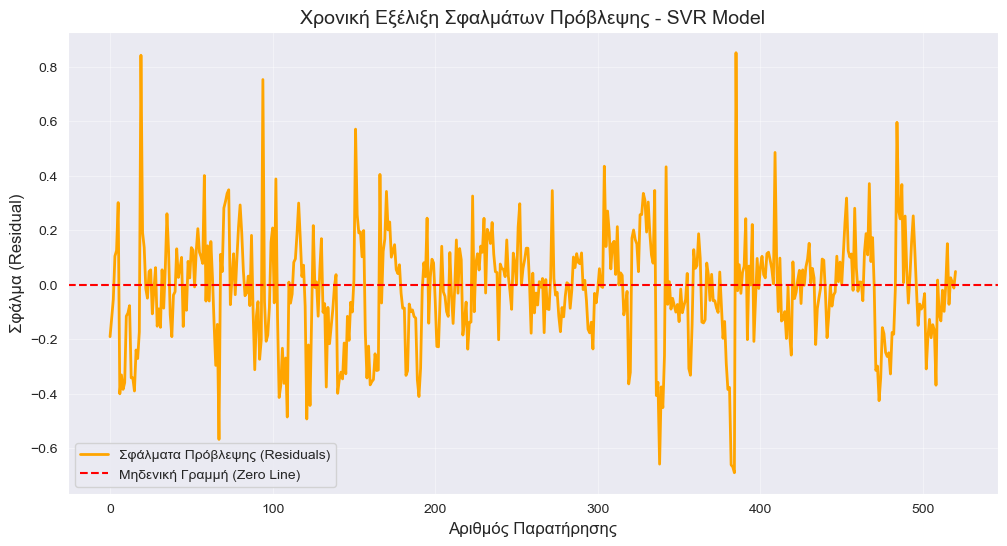

In [37]:
# Διάγραμμα Γραμμής για την Εξέλιξη των Σφαλμάτων
plt.figure(figsize=(12, 6))

# Line Plot για την Εξέλιξη των Σφαλμάτων
plt.plot(residuals, color="orange", label="Σφάλματα Πρόβλεψης (Residuals)", linewidth=2)

# Χωριστή γραμμή για το μηδέν (Zero Line)
plt.axhline(y=0, color="red", linestyle="--", label="Μηδενική Γραμμή (Zero Line)")

# Προσθήκη τίτλου και ετικετών
plt.title("Χρονική Εξέλιξη Σφαλμάτων Πρόβλεψης - SVR Model", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Σφάλμα (Residual)", fontsize=12)

# Προσθήκη Υπομνήματος
plt.legend()

# Εμφάνιση Πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του Διαγράμματος
plt.show()

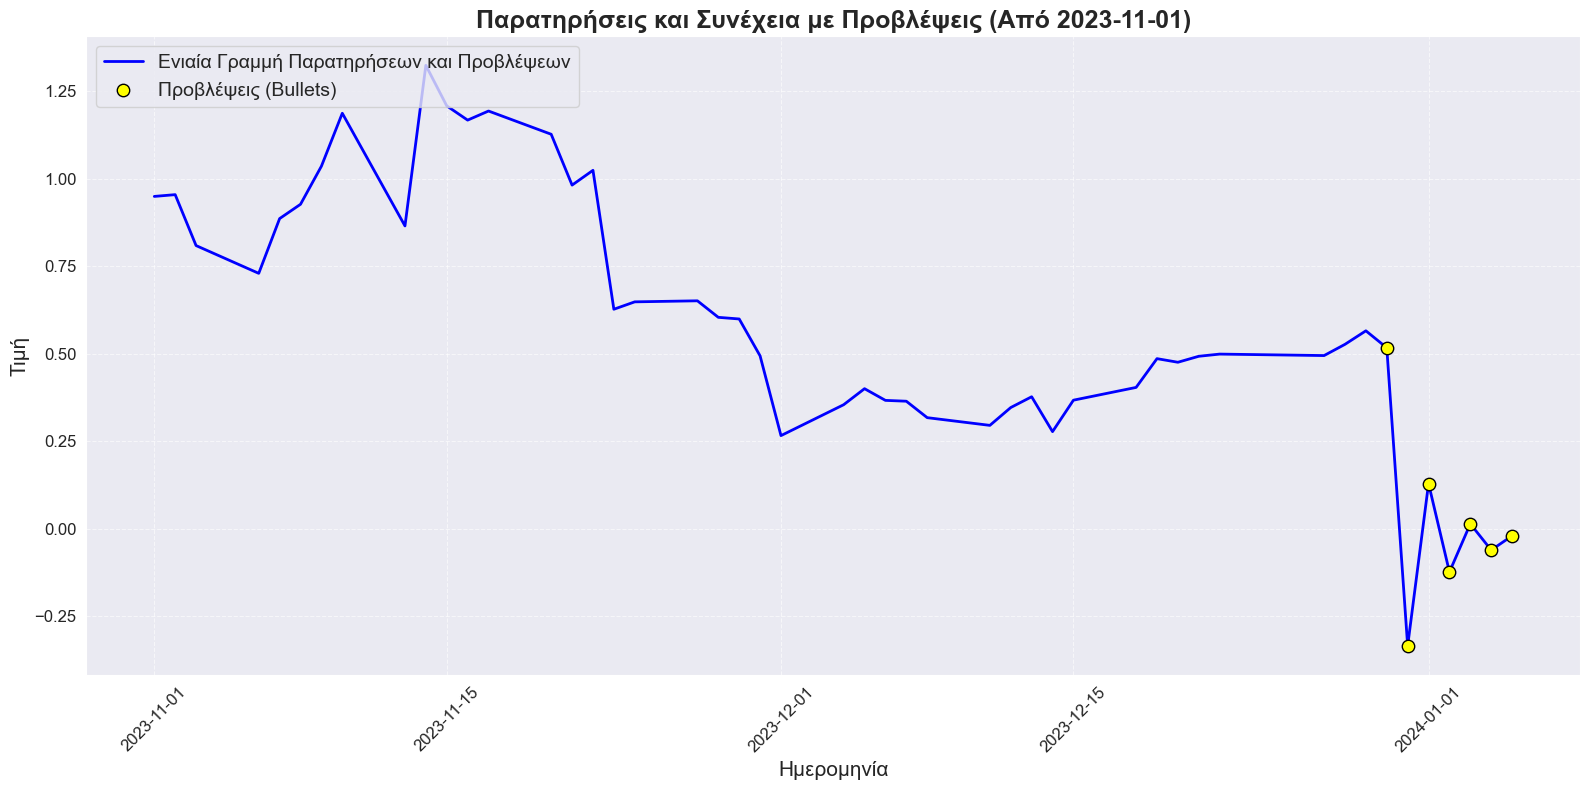

In [38]:
# Φιλτράρισμα του test set, αν χρειάζεται
test_data_filtered = y_test.copy()  # Το y_test είναι το test set με τις πραγματικές τιμές

# Φιλτράρισμα δεδομένων από την ημερομηνία 2023-11-01 και μετά
test_data_filtered = test_data_filtered.loc["2023-11-01":]

# Προσθήκη των μελλοντικών προβλέψεων στο test_data_filtered ώστε να έχουν συνεχή καμπύλη
test_data_filtered = test_data_filtered.reindex(
    test_data_filtered.index.union(future_dates)
)  # Προσθήκη των μελλοντικών ημερομηνιών στο index
test_data_filtered.loc[future_dates] = future_predictions  # Προσθήκη των προβλέψεων στις νέες ημερομηνίες

# Δημιουργία διαγράμματος
plt.figure(figsize=(16, 8))

# Εμφάνιση ενιαίας μπλε γραμμής (Παρατηρήσεις και Προβλέψεις)
plt.plot(
    test_data_filtered.index,
    test_data_filtered.values,
    linestyle='-',
    color="blue",
    linewidth=2,
    label="Ενιαία Γραμμή Παρατηρήσεων και Προβλέψεων"
)

# Κίτρινα Bullets μόνο για τις Προβλέψεις
future_predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Prediction": future_predictions
}).set_index("Date")
plt.scatter(
    future_predictions_df.index,
    future_predictions_df["Prediction"].values,
    color="yellow",
    edgecolor="black",
    label="Προβλέψεις (Bullets)",
    s=80,
    zorder=3
)

# Προσθήκη τίτλων, υπόμνημα και αξόνων
plt.title("Παρατηρήσεις και Συνέχεια με Προβλέψεις (Από 2023-11-01)", fontsize=18, fontweight='bold')
plt.xlabel("Ημερομηνία", fontsize=15)
plt.ylabel("Τιμή", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=14, loc="upper left")

# Βελτιστοποίηση διάταξης
plt.tight_layout()

# Εμφάνιση διαγράμματος
plt.show()

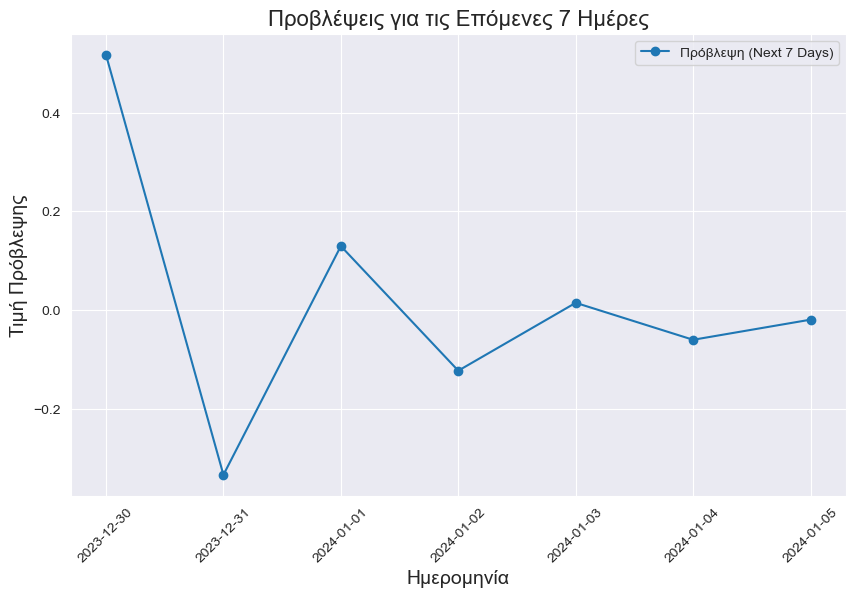

In [39]:
# Οπτικοποίηση προβλέψεων
plt.figure(figsize=(10, 6))
plt.plot(future_df["Date"], future_df["Prediction"], marker="o", label="Πρόβλεψη (Next 7 Days)", linestyle="-")
plt.title("Προβλέψεις για τις Επόμενες 7 Ημέρες", fontsize=16)
plt.xlabel("Ημερομηνία", fontsize=14)
plt.ylabel("Τιμή Πρόβλεψης", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

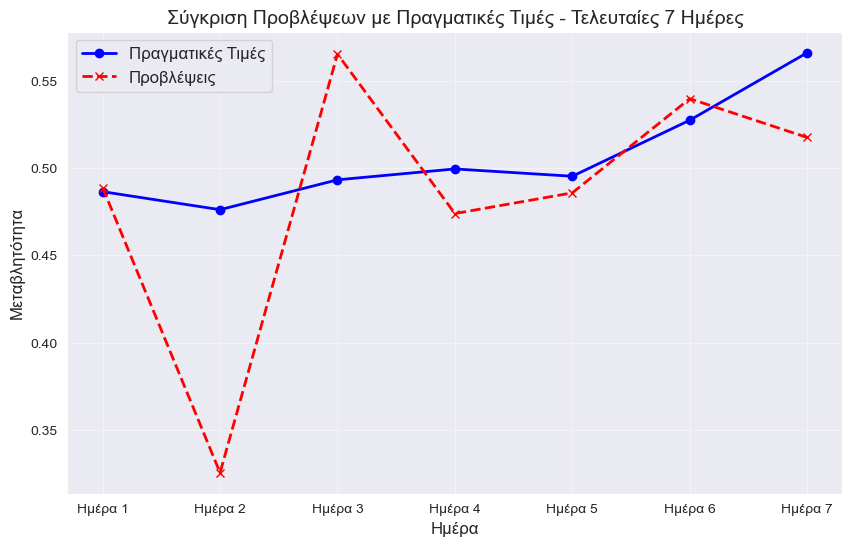

In [40]:
# Επιλέγουμε τα δεδομένα μόνο για τις τελευταίες 7 παρατηρήσεις
actual_last_7 = y_test.values[-7:]  # Οι πραγματικές τιμές για τις τελευταίες 7 ημέρες
predicted_last_7 = y_pred[-7:]  # Οι προβλέψεις για τις τελευταίες 7 ημέρες

# Δημιουργία διαγράμματος
plt.figure(figsize=(10, 6))

# Οπτικοποίηση των πραγματικών τιμών (τελευταίες 7 ημέρες)
plt.plot(range(1, 8), actual_last_7, label='Πραγματικές Τιμές', color='blue', linestyle='-', marker='o', linewidth=2)

# Οπτικοποίηση των προβλέψεων (τελευταίες 7 ημέρες)
plt.plot(range(1, 8), predicted_last_7, label='Προβλέψεις', color='red', linestyle='--', marker='x', linewidth=2)

# Προσθήκη τίτλου και ετικετών
plt.title('Σύγκριση Προβλέψεων με Πραγματικές Τιμές - Τελευταίες 7 Ημέρες', fontsize=14)
plt.xlabel('Ημέρα', fontsize=12)
plt.xticks(range(1, 8), labels=[f'Ημέρα {i}' for i in range(1, 8)])  # Ονόματα για τις τελευταίες 7 ημέρες
plt.ylabel('Μεταβλητότητα', fontsize=12)

# Προσθήκη πλέγματος
plt.grid(alpha=0.4)

# Προσθήκη υπομνήματος
plt.legend(fontsize=12)

# Εμφάνιση του διαγράμματος
plt.show()